Predicting the Likelihood of Dementia in Senior Citizens and Alzheimer's Analysis

In [112]:
# Importing necessary packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acs, confusion_matrix as cm

In [113]:
# Reading the dataset taken to predict dementia and alzheimer's in patient
df = pd.read_csv('oasis_longitudinal.csv')

In [114]:
# Displaying the first 5 records of the dataset
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [115]:
# Displaying the number of records and attributes present in the dataset
df.shape

(373, 15)

<AxesSubplot:>

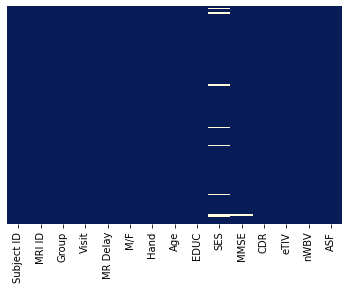

In [116]:
# Visualizing the count of missing values present in the dataset
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = "YlGnBu_r")

In [117]:
# Finding the exact count of missing values present in the dataset
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [118]:
# Creating a dataframe which consists of records having missing values in any of its attributes
df1 = df[df.isna().any(axis = 1)]

In [119]:
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [120]:
print("Pearson correlation coefficient for SES and EDUC:", np.corrcoef(df['SES'],df['EDUC'])[0,1])

Pearson correlation coefficient for SES and EDUC: nan


In [121]:
# Creating a dataframe which consists of records which have years of education (i.e. EDUC) = 12
df2 = df[df['EDUC'] == 12]

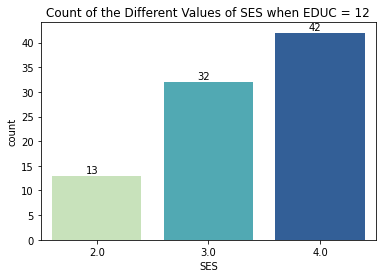

In [122]:
ax = sns.countplot(x = 'SES', data = df2, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES when EDUC = 12')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))
plt.show()

In [123]:
# Creating a dataframe which consists of records which have years of education (i.e. EDUC) = 16
df2 = df[(df['EDUC'] == 16)]

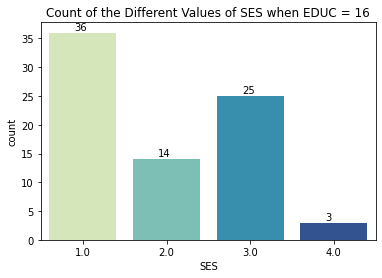

In [124]:
ax = sns.countplot(x = 'SES', data = df2, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES when EDUC = 16')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))
plt.show()

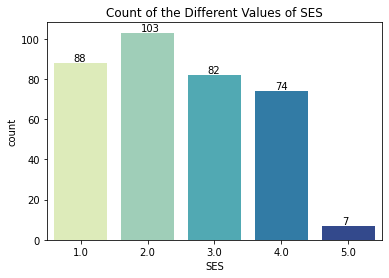

In [125]:
ax = sns.countplot(x = 'SES', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.8))
plt.show()

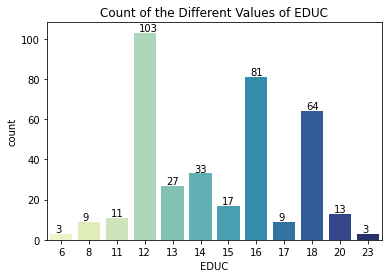

In [126]:
ax = sns.countplot(x = 'EDUC', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of EDUC')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.18, p.get_height() + 0.8))
plt.show()

In [127]:
# Creating a function for imputing the missing SES values
def addSES(cols):
    SES = cols[0]
    EDUC = cols[1]
    if pd.isnull(SES):
      if EDUC == 12:
        x = random.randint(1, 87)
        if x < 43:
          return 4.0 
        elif x < 75:
          return 3.0
        else: 
          return 2.0
      else:  
        x = random.randint(1, 38)
        if x < 25:
          return 3.0
        else:
          return 2.0
    else:
      return SES

In [128]:
# Imputing missing SES values in the dataset
df['SES'] = df[['SES','EDUC']].apply(addSES, axis = 1)

In [129]:
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [130]:
# Creating a dataframe which consists of records which have CDR = 1, gender = female, dominant hand = right and years of 
# education (i.e. EDUC) = 12 since these are the common attribute values for the records having missing MMSE values
df3 = df[(df['CDR'] == 1.0) & (df['M/F'] == 'F') & (df['Hand'] == 'R') & (df['EDUC'] == 12)]

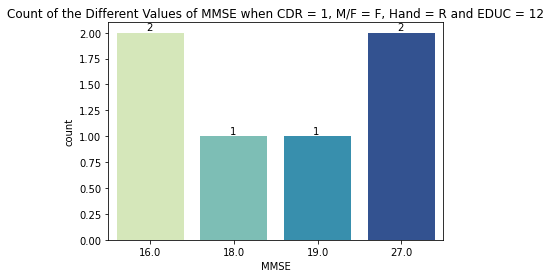

In [131]:
ax = sns.countplot(x = 'MMSE', data = df3, palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE when CDR = 1, M/F = F, Hand = R and EDUC = 12')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 0.02))
plt.show()

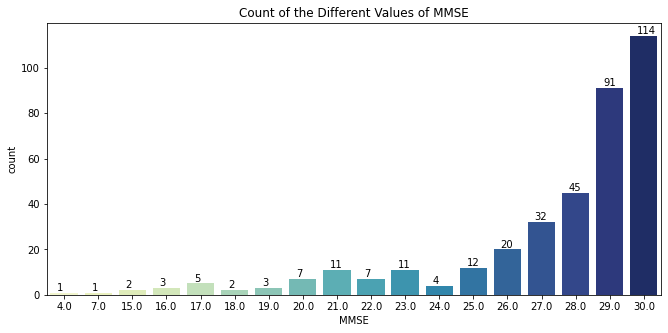

In [132]:
plt.figure(figsize = (11,5))
ax = sns.countplot(x = 'MMSE', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 0.9))
plt.show()

In [133]:
# Creating a function for imputing the missing MMSE values
def addMMSE(cols):
    MMSE = cols[0]    
    if pd.isnull(MMSE):
      y = random.randint(1, 6)
      if y < 3:
        return 16.0
      elif y < 5:
        return 27.0
      elif y == 5:
        return 18.0 
      else:
        return 19.0
    else:
        return MMSE

In [134]:
# Imputing missing MMSE values in the dataset
df['MMSE'] = df[['MMSE']].apply(addMMSE, axis = 1)

In [135]:
# Checking whether imputation has been done properly and no other null values have been missed out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


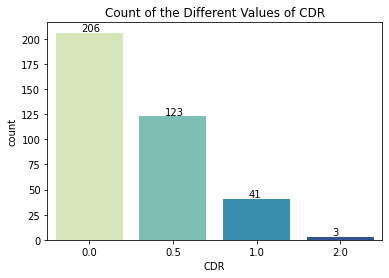

In [136]:
# Clinical Dementia Rating (CDR): 0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD 
# (Source:https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal)
ax = sns.countplot(x = 'CDR', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of CDR')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

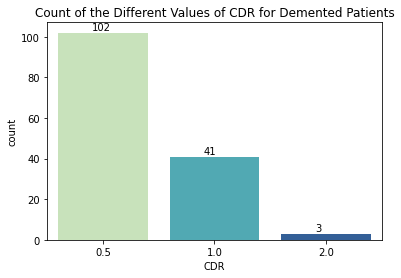

In [137]:
# "Every case of Alzheimer's disease is an example of dementia, but not every type of dementia is Alzheimer's." 
# (Source: https://alzheimer.ca/en/about-dementia/what-alzheimers-disease/difference-between-alzheimers-disease-other-dementias)
ax = sns.countplot(x = 'CDR', data = df[(df['Group'] == 'Demented')], palette = 'YlGnBu')
plt.title('Count of the Different Values of CDR for Demented Patients')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

In [138]:
# Creating a dataframe with only the numerical attributes
num_df = df.select_dtypes(exclude = ['object'])
num_df.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

<AxesSubplot:>

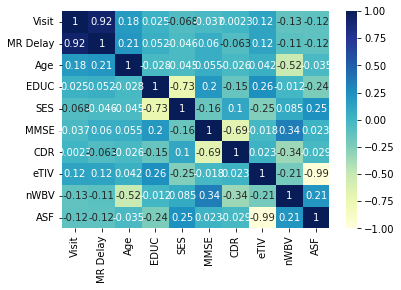

In [139]:
# Finding the correlation between the numerical attributes present in the dataset
sns.heatmap(num_df.corr(), annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

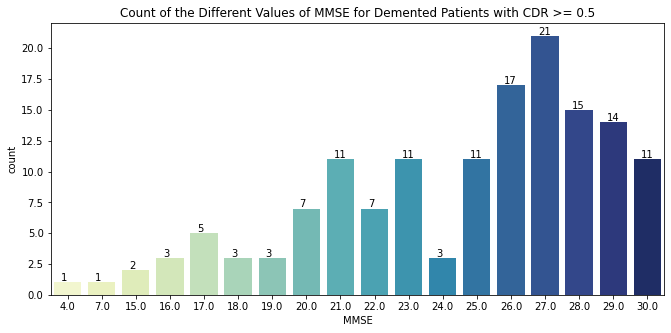

In [140]:
# MMSE values range from 0 = worst to 30 = best
plt.figure(figsize = (11,5))
ax = sns.countplot(x = 'MMSE', data = df[(df['Group'] == 'Demented') & (df['CDR'] >= 0.5)], palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE for Demented Patients with CDR >= 0.5')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 0.1))
plt.show()

In [141]:
# Creating a dataframe with only the categorical attributes
cat_df = df.select_dtypes(include = ['object'])
cat_df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand'], dtype='object')

In [142]:
# Dropping the irrelevant categorical attributes
df = df.drop(['Subject ID', 'MRI ID', 'Hand'], axis = 1)
cat_df = cat_df.drop(['Subject ID', 'MRI ID', 'Hand'], axis = 1)

In [143]:
# Using label encoder to encode Gender
ls = LabelEncoder()
encoded = ls.fit(df['M/F'])
fin_encoded = ls.transform(df['M/F'])
df['M/F'] = fin_encoded
cat_df['M/F'] = fin_encoded

In [144]:
# Using point biserial correlation to find the relationship between CDR and Gender
print(stats.pointbiserialr(cat_df['M/F'], num_df['CDR']))
# Since p-value > 0.05, therefore, the relationship between CDR and Gender is not significant

PointbiserialrResult(correlation=0.20213994473494853, pvalue=8.440795727599894e-05)


In [145]:
# From the above analysis, we can observe that no other attribute is significantly related to CDR in order to help us
# find whether the patient has Alzheimer's Disease. Hence, we can classify whether a person has Alzheimer's
# Disease or not as:

In [146]:
def conditions(cols):
    Group = cols[0]
    CDR = cols[1]
    if Group == 'Demented':
        if CDR == 0.5:
            return 'Very Mild AD'
        elif CDR == 1.0:
            return 'Mild AD'
        else:
            return 'Moderate AD'
    else:
        return 'No AD'

In [147]:
df4 = df.copy()
df4['Alzheimers'] = df4[['Group','CDR']].apply(conditions, axis = 1)

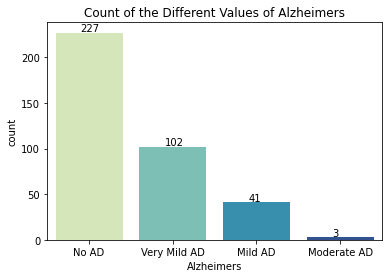

In [148]:
ax = sns.countplot(x = 'Alzheimers', data = df4, palette = 'YlGnBu')
plt.title('Count of the Different Values of Alzheimers')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

In [149]:
# Label Encoding the other categorical variables
encoded = ls.fit(df['Group'])
fin_encoded = ls.transform(df['Group'])
df['Group'] = fin_encoded
cat_df['Group'] = fin_encoded

In [150]:
# Creating function to detect outliers
# Only the attributes which contain multiple outliers are returned by the function
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5

        # Detecting outliers and their indices
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # Storing the indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [151]:
# Calling the above function in order to detect outliers in the dataset
L = detect_outliers(num_df,num_df.columns)
print(L)

[]


In [152]:
# Displaying dataset after missing value imputation, label encoding the categorical attributes and outlier analysis 
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,4.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,4.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,4.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,2,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [153]:
# Splitting the dataset attributes into target attributes (i.e. y) and predictor attributes (x)
y = df['Group']
X = df.drop(['Group'], axis = 1)

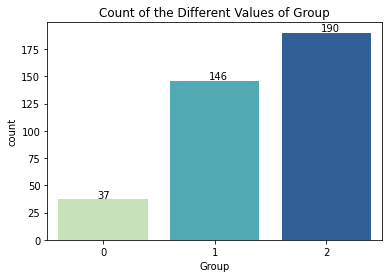

In [154]:
ax = sns.countplot(x = 'Group', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of Group')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1.5))
plt.show()

In [155]:
# Stratified train-test split for predicting dementia (i.e. y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 56, stratify = y)

In [156]:
# Scaling the input/predictor attributes using robust scaler
rs = RobustScaler()
rs.fit(X_train)

X_train = rs.transform(X_train)
X_test = rs.transform(X_test)

# Deep Learning

The following section contains the implementation of Deep Learning using a Sequential model and an MLP Classifier.

## Sequential Model

In [174]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers
import matplotlib.pyplot as pt

In [175]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (279, 11)
Target matrix: (94, 11)
Feature matrix: (279,)
Target matrix: (94,)


In [176]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [177]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [178]:
history = model.fit(X_train, y_train, epochs=100, 
          batch_size=50, 
          validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 31ms/step - loss: 1.0877 - accuracy: 0.5591 - val_loss: 1.0690 - val_accuracy: 0.6915
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0562 - accuracy: 0.6738 - val_loss: 1.0366 - val_accuracy: 0.6489
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0167 - accuracy: 0.6989 - val_loss: 0.9915 - val_accuracy: 0.6596
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9621 - accuracy: 0.7204 - val_loss: 0.9313 - val_accuracy: 0.7128
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8908 - accuracy: 0.7563 - val_loss: 0.8578 - val_accuracy: 0.7128
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8100 - accuracy: 0.7742 - val_loss: 0.7717 - val_accuracy: 0.7447
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7144 - accuracy: 0.8065 - val_loss: 0.6693 - val_accuracy: 0.7872
Epoch 8/100
6/6 [=========

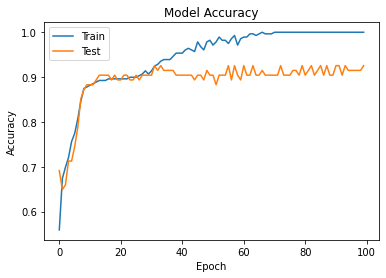

In [179]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

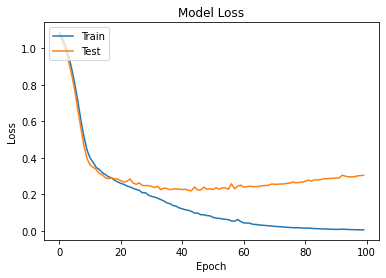

In [180]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

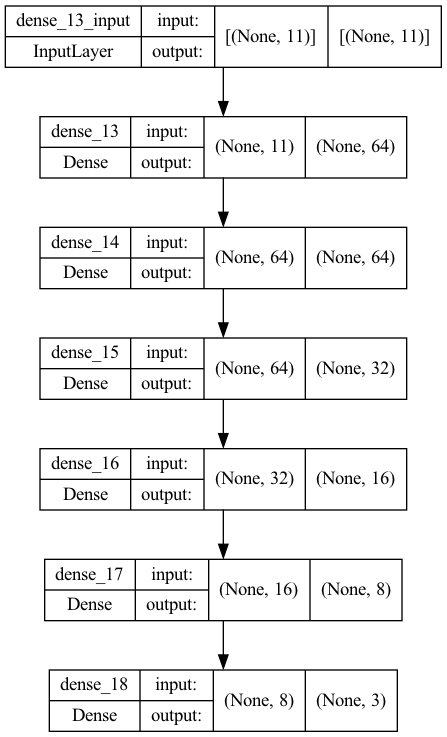

In [181]:
tf.keras.utils.plot_model(model, show_shapes=True)

## MLP Classifier

In [182]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100, 100, 100]))

# fit the model 
mlp.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [183]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [184]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data:",format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 1.000
Multilayer Perceptrons: Accuracy on test Data: 0.9042553191489362


## Other Implementations
The following section contains a few other implementations that were utilized but weren't suitable for the given use case due to constraints of the model itself.

### ResNet50
The ResNet architecture consists of a series of "residual blocks," which contain skip connections that allow gradients to flow more easily through the network. These skip connections pass the input of a given layer directly to a later layer in the network, allowing information to bypass potentially problematic layers.

However, ResNet is specifically designed to process images, which are represented as 3-dimensional tensors (height x width x channels). In other words, ResNet expects its inputs to be images, which have both spatial dimensions (height and width) as well as color channels (typically red, green, and blue).

Covariates typically do not have spatial dimensions or color channels, and therefore cannot be represented as 3-dimensional tensors. Instead, they are usually represented as vectors (i.e., 1-dimensional arrays) or matrices (i.e., 2-dimensional arrays).

So while ResNet is a powerful tool for processing images, it is not suitable for processing covariates.

In [185]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.resnet import ResNet50

# Create the ResNet50 model
base_model = ResNet50(weights=None, include_top=False, input_shape=(11,))

# Add custom dense layers on top of the pretrained model
model = Sequential()
model.add(base_model)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with appropriate loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on your training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on your testing data
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Make predictions on new data
y_pred = model.predict(X_new)


ValueError: `input_shape` must be a tuple of three integers.

### GANs
Like ResNet, GANs are designed to process inputs that are represented as 3-dimensional tensors (height x width x channels) in the case of image generation. However, GANs require more than just a 3-dimensional tensor as input - they require a noise vector as well.

This noise vector is typically a 1-dimensional array of random values, and it is used as input to the generator network in a GAN. The generator then uses this noise vector to produce a generated image, which is then evaluated by the discriminator network to determine if it is real or fake.

Covariates, on the other hand, are not typically represented as 3-dimensional tensors or noise vectors. Instead, covariates are usually represented as vectors or matrices, as mentioned earlier. Therefore, GANs are not suitable for processing covariates directly. 

In [186]:
from keras.layers import Dense, Reshape, Flatten, Input, Concatenate, Embedding
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the generator model
def build_generator():
    noise_input = Input(shape=(100,))
    label_input = Input(shape=(1,))
    label_embedding = Flatten()(Embedding(3, 100)(label_input))
    combined_input = Concatenate()([noise_input, label_embedding])
    x = Dense(256, activation='relu')(combined_input)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(X_train.shape[1], activation='tanh')(x)
    x = Reshape(X_train.shape[1:])(x)
    return Model(inputs=[noise_input, label_input], outputs=x)

# Define the discriminator model
def build_discriminator():
    input_data = Input(shape=X_train.shape[1:])
    x = Flatten()(input_data)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    return Model(inputs=input_data, outputs=output)

# Build and compile the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    noise_input = Input(shape=(100,))
    label_input = Input(shape=(1,))
    generated_data = generator([noise_input, label_input])
    discriminator_output = discriminator(generated_data)
    gan = Model(inputs=[noise_input, label_input], outputs=discriminator_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return gan

# Build the generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Build the GAN model
gan = build_gan(generator, discriminator)

# Train the GAN
batch_size = 128
epochs = 10000
for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    labels = np.random.randint(0, 3, (batch_size, 1))
    fake_data = generator.predict([noise, labels])
    real_indices = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[real_indices]
    real_labels = y_train[real_indices]

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(real_data, np.ones(batch_size))
    discriminator.train_on_batch(fake_data, np.zeros(batch_size))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch([noise, labels], np.ones(batch_size))

    # Print the loss and save the generated samples
    if epoch % 100 == 0:
        print("Epoch: {}/{}".format(epoch, epochs))
        print("Discriminator loss:", discriminator.history['loss'][-1])
        print("Generator loss:", gan.history['loss'][-1])
        generated_data = generator.predict([np.random.normal(0, 1, (10, 100)), np.random.randint(0, 3, (10, 1))])
        print("Generated data:", generated_data)

# Use the generator to generate new samples
new_data = generator.predict([np.random.normal(0, 1, (100, 100)), np.random.randint(0, 3, (100, 1))])
discriminator.predict(new_data)
test_labels = y_test.argmax(axis=1)
test_loss, test_accuracy = gan.evaluate([X_test, test_labels], y_test)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)                                            

/usr/local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyError: '[133, 210, 130, 48, 250, 214, 80, 243, 37, 181, 1, 242, 276, 208, 103, 203, 76, 95, 222, 194, 43, 255, 112, 117, 257, 19, 17, 136, 195] not in index'